In [94]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import json
import requests
from config import api_key

# Create a reference the CSV file desired
csv_path = "2017_peak_hours_report_kdfactor.csv"
'''PEAK HOUR VOLUME DATA Peak hour volume data consists of hourly volume relationships and data location. The hourly volumes are expressed as a percentage of the Annual Average Daily Traffic (AADT). The percentages are shown for both the AM and the PM peak periods. The principle data described here are the K factor, the D factor and their product (KD). The K factor is the percentage of AADT during the peak hour for both directions of travel. The D factor is the percentage of the peak hour travel in the peak direction. KD multiplied with the AADT gives the one way peak period directional flow rate or the design hourly volume (DHV). The design hourly volume is used for either Operational Analysis or Design Analysis. Refer to the 2016 Highway Capacity Manual, 6th Edition A Guide for Multimodal Mobility Analysis for more details.'''

# Read the CSV into a Pandas DataFrame
aadt_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
aadt_df.head()

,DI,RTE,CO,PRE,PM,CS,LEG,YR,AM_DIR,AM_WAY_PHV,...,AM_DAY,AM_MONTH,PM_DIR,PM_WAY_PHV,PM_K_FACTOR_AMT,PM_D_FACTOR_AMT,PM_KD_FACTOR,PM_HOUR,PM_DAY,PM_MONTH
0,12,1,ORA,NaN,22.500,623.0,O,17,S,2536,...,WED,NOV,N,2596,8.92,78.86,7.03,18,WED,FEB
1,12,1,ORA,NaN,30.141,937.0,A,16,N,14488,...,FRI,JUN,S,3012,7.82,75.49,5.90,19,WED,OCT
2,7,1,LA,NaN,18.090,7.0,A,15,N,1143,...,THU,OCT,S,1321,8.02,56.31,4.52,17,TUE,NOV
3,7,1,LA,NaN,27.100,425.0,O,17,N,4363,...,TUE,OCT,N,3980,7.66,62.80,4.81,17,TUE,JUN
4,7,1,LA,NaN,40.769,720.0,A,16,N,2106,...,MON,FEB,N,2742,9.64,58.20,5.61,17,TUE,JAN


In [95]:
aadt_df.shape

(1412, 24)

In [96]:
# Check to see if there are any rows with missing data
# We have 1412 rows of data from 2015 to 2017 and 24 columns
aadt_df.count()

DI                 1412
RTE                1412
CO                 1412
PRE                 449
PM                 1412
CS                 1411
LEG                1412
YR                 1412
AM_DIR             1412
AM_WAY_PHV         1412
AM_K_FACTOR_AMT    1412
AM_D_FACTOR_AMT    1412
AM_KD_FACTOR       1412
AM_HOUR            1412
AM_DAY             1412
AM_MONTH           1412
PM_DIR             1412
PM_WAY_PHV         1412
PM_K_FACTOR_AMT    1412
PM_D_FACTOR_AMT    1412
PM_KD_FACTOR       1412
PM_HOUR            1412
PM_DAY             1412
PM_MONTH           1412
dtype: int64

In [97]:
# Collect a list of traffic locations in CA
columns = [
    "DI",  # Caltrans has twelve transportation districts statewide. This abbreviation identifies the district in which the count station is located. 
    "RTE", # The state highway route number. 
    "CO", # County abbreviation used by Caltrans
    "PRE", # The postmile may have a prefix like R, T, L, M, etc. When a length of highway is changed due to construction or realigment, new postmile values are assigned. To distinguish the new values from the old, an alpha code is prefixed to the new postmile. '''
    "PM", # The Post Mile is the mileage measured from the county line, or from the beginning of a route. Each postmile along a route in a county is a unique location on the state highway system. 
    "CS", # Control Station Number, Caltrans identification number for monitoring site. 
    "LEG", # For traffic counting purposes, a highway intersection or interchange is assigned two legs according to increasing postmiles (route direction) and with a postmile reference at the center of the intersection or interchange. 
    #  The volume of traffic on each leg is denoted by an A, B or O. 
    #  A = ahead leg, B = back leg, and O – traffic volume being same for both back and ahead legs.    
    "YR", # The year when the count was made. Traffic counting is on a 3-year cycle.
    "AM_DIR",   # Indicates direction of travel for peak volume.
    "AM_WAY_PHV",  # Peak Hour Volume in the peak direction. A one way volume in vehicles per hour (vph) as used here. The PHV is analogous to the DDHV as used for design purposes
    "AM_K_FACTOR_AMT", # The percentage of the AADT in both directions during the peak hour. Values in this table are derived by dividing the measured 2-way PHV by the AADT.
    "AM_D_FACTOR_AMT", #  D factor. The percentage of traffic in the peak direction during the peak hour.  Values in this book are derived by dividing the measured PHV by the sum of both directions of travel during the peak hour.
    "AM_KD_FACTOR",   #  The product of K and D. The percentage of AADT in the peak direction during the peak hour. Values in this table are derived by dividing the measured 1-way PHV by the AADT. 
    "AM_HOUR", 
    "AM_DAY",
    "AM_MONTH",
    "PM_DIR", 
    "PM_WAY_PHV",
    "PM_K_FACTOR_AMT",
    "PM_D_FACTOR_AMT",
    "PM_KD_FACTOR",
    "PM_HOUR",
    "PM_DAY",
    "PM_MONTH"
]

In [98]:
# Create a group based on the routes and mile post in California
aadt_group = aadt_df.groupby(['CO','RTE','PM'])

# look at count per location
print(f"aadt_group.count={aadt_group.count()}")

# o-Count how many times each location appears in our group

aadt_group.count=                DI  PRE  CS  LEG  YR  AM_DIR  AM_WAY_PHV  AM_K_FACTOR_AMT  \
CO  RTE PM                                                                  
ALA 13  4.262    1    0   1    1   1       1           1                1   
        13.906   1    0   1    1   1       1           1                1   
    61  18.520   1    0   1    1   1       1           1                1   
    77  0.098    1    0   1    1   1       1           1                1   
    80  1.989    1    0   1    1   1       1           1                1   
    84  26.215   1    1   1    1   1       1           1                1   
    580 10.689   1    0   1    1   1       1           1                1   
        30.354   1    0   1    1   1       1           1                1   
    680 1.961    1    1   1    1   1       1           1                1   
        20.057   1    1   1    1   1       1           1                1   
ALP 89  23.972   1    0   1    1   1       1           1   

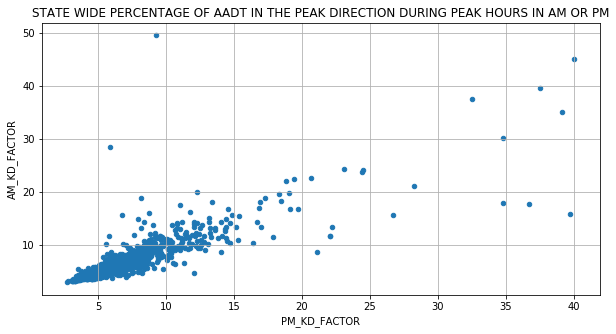

In [99]:
# Create a scatter plot which compares PM PHV  to AM PHV for all highways
aadt_df.plot(kind="scatter", x="PM_KD_FACTOR", y="AM_KD_FACTOR", grid=True, figsize=(10,5),
              title="STATE WIDE PERCENTAGE OF AADT IN THE PEAK DIRECTION DURING PEAK HOURS IN AM OR PM")
plt.show()
# 1412 records of AADT with route and mile post; no lat and long
# Plot indicates 2% to 20% OF daily traffic occurs in peak morning hour
# 3% to 15% of daily traffic occurs in peak evening hour.

In [100]:
# Filter the data so that only those sightings in sf are in a DataFrame
aadt2_df = aadt_df.loc[aadt_df["CO"] == "SF", columns]
aadt2_df

,DI,RTE,CO,PRE,PM,CS,LEG,YR,AM_DIR,AM_WAY_PHV,...,AM_DAY,AM_MONTH,PM_DIR,PM_WAY_PHV,PM_K_FACTOR_AMT,PM_D_FACTOR_AMT,PM_KD_FACTOR,PM_HOUR,PM_DAY,PM_MONTH
32,4,1,SF,NaN,4.050,103.0,B,16,N,2535,...,SAT,OCT,S,2505,6.70,52.55,3.52,16,TUE,JAN
868,4,101,SF,NaN,5.322,110.0,B,16,S,1725,...,THU,NOV,N,1691,6.21,59.40,3.69,17,THU,AUG
869,4,101,SF,NaN,5.940,111.0,A,16,N,1484,...,FRI,MAY,N,1963,6.68,68.07,4.55,17,FRI,MAY
1301,4,280,SF,R,0.000,112.0,A,17,N,6420,...,THU,OCT,S,6544,8.68,53.51,4.64,15,FRI,OCT


In [101]:
# Set x axis and tick locations
x_axis = np.arange(len(aadt2_df))
tick_locations = [value for value in x_axis]

In [102]:
#create summary 
County_sum = (aadt_df.groupby("CO")["AM_WAY_PHV"].count())
AM_max = (aadt_df.groupby("CO")["AM_WAY_PHV"].max())
PM_max = (aadt_df.groupby("CO")["PM_WAY_PHV"].max())
AM_avg = (aadt_df.groupby("CO")["AM_WAY_PHV"].mean().round(2))
PM_avg = (aadt_df.groupby("CO")["PM_WAY_PHV"].mean().round(2))
AM_min = (aadt_df.groupby("CO")["AM_WAY_PHV"].min())
PM_min = (aadt_df.groupby("CO")["PM_WAY_PHV"].min())

ca_df = pd.DataFrame({'AM max PHV': AM_max, 'PM max PHV': PM_max, 'AM avg PHV': AM_avg, 'PM avg PHV': PM_avg, 'AM min PHV': AM_min, 'PM min PHV': PM_min })
ca_df


,AM max PHV,PM max PHV,AM avg PHV,PM avg PHV,AM min PHV,PM min PHV
CO,,,,,,
ALA,9749,10713,4914.70,4997.30,939,852
ALP,372,706,372.00,706.00,372,706
AMA,703,818,536.75,660.00,408,566
BUT,3778,4259,878.08,935.88,81,93
CAL,489,431,329.00,313.33,94,90
CC,9880,10782,5391.31,5470.38,772,502
COL,1852,2061,577.20,663.80,45,51
DN,591,634,367.00,397.67,208,221
ED,3259,3521,1064.67,1114.17,235,250


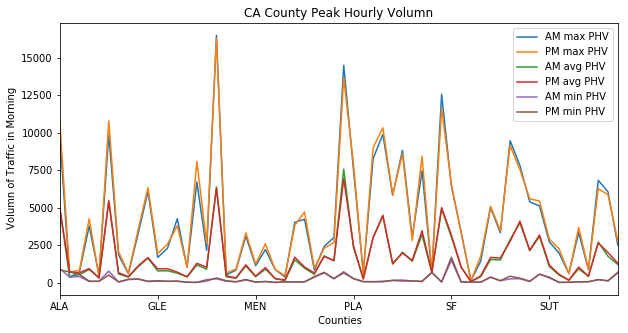

<Figure size 432x288 with 0 Axes>

In [119]:
# Plot Data 
ca_df.plot(kind="line", figsize=(10,5))

# Set a title for the chart
plt.title("CA County Peak Hourly Volumn")
plt.xlabel(" Counties")
plt.ylabel(" Volumn of Traffic in Morning")

#Add the legend.
legend = plt.legend(loc = "best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.show()
plt.tight_layout()

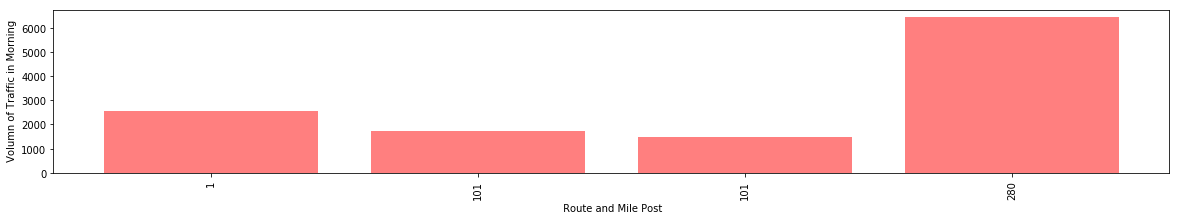

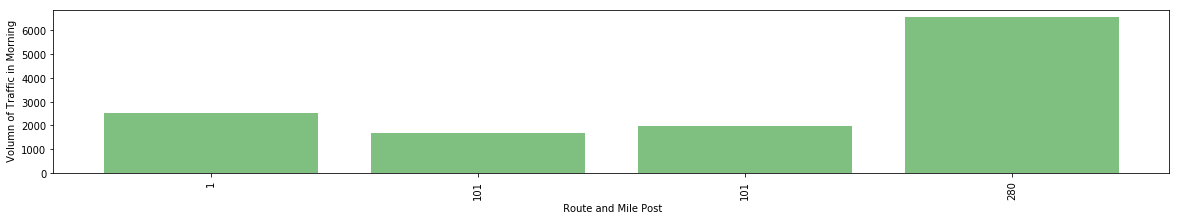

In [104]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.xlabel(" Route and Mile Post")
plt.ylabel(" Volumn of Traffic in Morning")
plt.bar(x_axis, aadt2_df["AM_WAY_PHV"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, aadt2_df["RTE"], rotation="vertical")

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.xlabel(" Route and Mile Post")
plt.ylabel(" Volumn of Traffic in Morning")
plt.bar(x_axis, aadt2_df["PM_WAY_PHV"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, aadt2_df["RTE"], rotation="vertical")

plt.show()

In [105]:
PM_PHV =(aadt2_df["PM_WAY_PHV"].max())
PM_PHV, " VEHICLES LEAVE SF ON HWY 280 IN THE EVENING COMMUTE"

(6544, ' VEHICLES LEAVE SF ON HWY 280 IN THE EVENING COMMUTE')

In [106]:
AM_PHV =(aadt2_df["AM_WAY_PHV"].max())
AM_PHV, " VEHICLES COME TO SF USING HWY 280 DURING MORNING COMMUTE"

(6420, ' VEHICLES COME TO SF USING HWY 280 DURING MORNING COMMUTE')

In [107]:
PM_PHV =(aadt2_df["PM_WAY_PHV"].max())
"HIGHEST TRAFFIC ON ROUTE 280 IN THE EVENING IS ", PM_PHV

('HIGHEST TRAFFIC ON ROUTE 280 IN THE EVENING IS ', 6544)

In [108]:
aadt3_df = aadt_df.loc[aadt_df["CO"] == "LA", columns]
aadt3_df.head()


,DI,RTE,CO,PRE,PM,CS,LEG,YR,AM_DIR,AM_WAY_PHV,...,AM_DAY,AM_MONTH,PM_DIR,PM_WAY_PHV,PM_K_FACTOR_AMT,PM_D_FACTOR_AMT,PM_KD_FACTOR,PM_HOUR,PM_DAY,PM_MONTH
2,7,1,LA,NaN,18.090,7.0,A,15,N,1143,...,THU,OCT,S,1321,8.02,56.31,4.52,17,TUE,NOV
3,7,1,LA,NaN,27.100,425.0,O,17,N,4363,...,TUE,OCT,N,3980,7.66,62.80,4.81,17,TUE,JUN
4,7,1,LA,NaN,40.769,720.0,A,16,N,2106,...,MON,FEB,N,2742,9.64,58.20,5.61,17,TUE,JAN
5,7,1,LA,NaN,48.171,45.0,A,16,N,1440,...,SAT,AUG,S,1497,9.91,51.27,5.08,15,FRI,MAR
44,7,2,LA,R,20.574,243.0,O,16,W,7348,...,TUE,SEP,E,7042,9.49,62.41,5.92,16,TUE,APR


In [109]:
# Set x axis and tick locations
x_axis = np.arange(len(aadt3_df))
tick_locations = [value for value in x_axis]

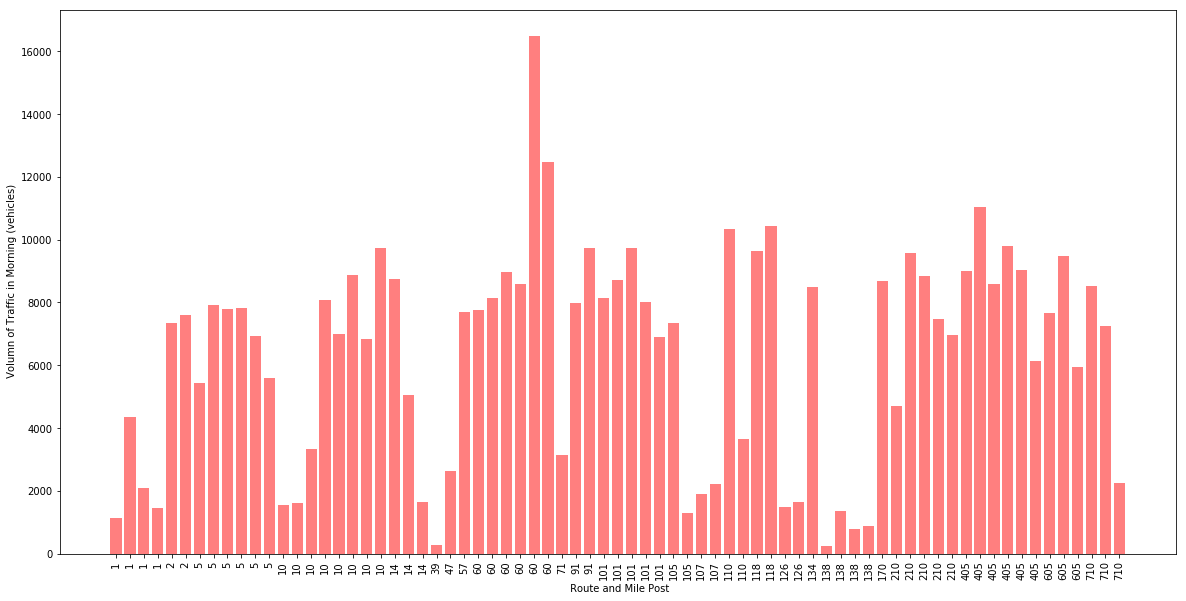

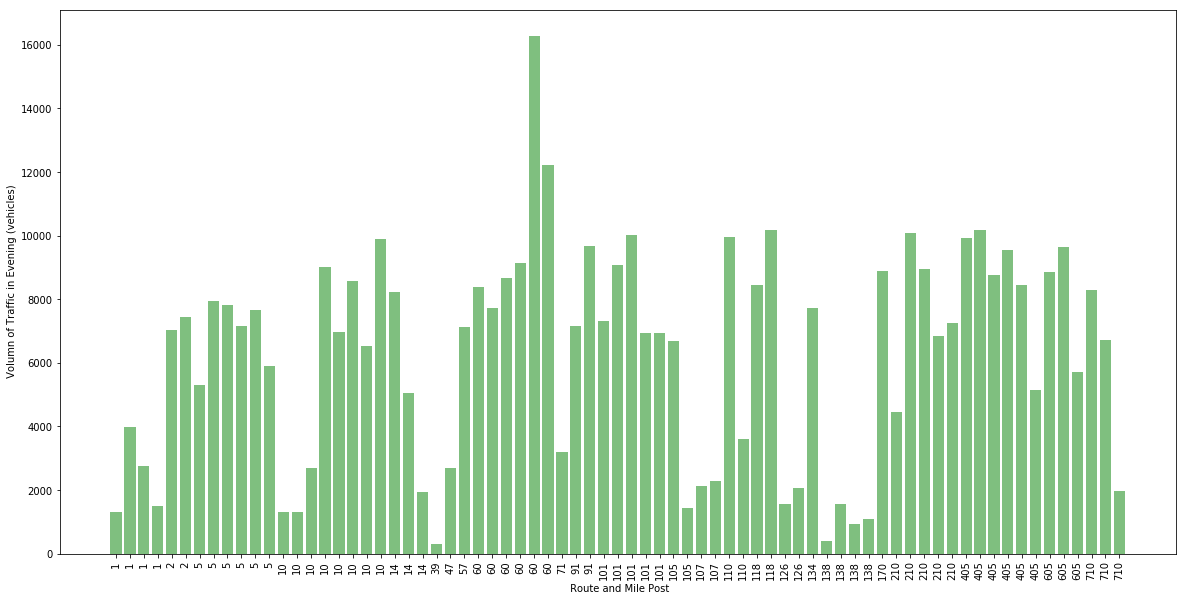

In [110]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.xlabel(" Route and Mile Post")
plt.ylabel(" Volumn of Traffic in Morning (vehicles)")
plt.bar(x_axis, aadt3_df["AM_WAY_PHV"], color='r', alpha=.5, align="center")
plt.xticks(tick_locations, aadt3_df["RTE"], rotation="vertical")

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.xlabel(" Route and Mile Post")
plt.ylabel(" Volumn of Traffic in Evening (vehicles)")
plt.bar(x_axis, aadt3_df["PM_WAY_PHV"], color='g', alpha=.5, align="center")
plt.xticks(tick_locations, aadt3_df["RTE"], rotation="vertical")

plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

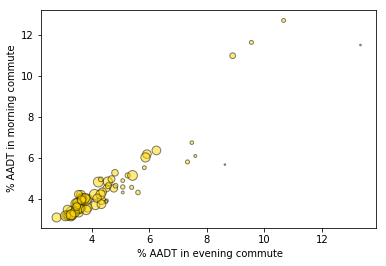

In [111]:
# The maximum x value for LA data only
x_limit = 20000000
y_limit = 20000000

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by percent of AADT at peak hour

plt.xlabel(" % AADT in evening commute")
plt.ylabel(" % AADT in morning commute")

plt.scatter(aadt3_df["PM_KD_FACTOR"], aadt3_df["AM_KD_FACTOR"],  marker="o", facecolors="gold", edgecolors="black",
            s=aadt3_df["AM_WAY_PHV"]/100, alpha=0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

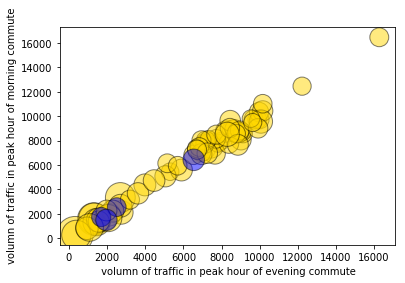

In [112]:
# The compare traffic volumn LA and SF
x_limit = 200000000
y_limit = 2000000
plt.xlabel(" volumn of traffic in peak hour of evening commute")
plt.ylabel(" volumn of traffic in peak hour of morning commute")

# LA
# The size of each point on our plot is determined by their x value
plt.scatter(aadt3_df["PM_WAY_PHV"], aadt3_df["AM_WAY_PHV"], marker="o", facecolors="gold", edgecolors="black",
            s=aadt3_df["PM_KD_FACTOR"]*100, alpha=0.5)
# SF
# The size of each point on our plot is determined by their x value
plt.scatter(aadt2_df["PM_WAY_PHV"], aadt2_df["AM_WAY_PHV"], marker="o", facecolors="blue", edgecolors="black",
            s=aadt2_df["PM_KD_FACTOR"]*100, alpha=0.5)

# LA has higher volumn of traffic
# LA has higher percentage of traffic traveling during commute hours
plt.show

In [113]:
# Save config informationfor open weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
city1 = "San Francisco"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city1

In [114]:
# Get weather data for SF from OPEN WEATHER API
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -76.88, 'lat': 1.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 281.981, 'pressure': 1013.19, 'humidity': 84, 'temp_min': 281.981, 'temp_max': 281.981, 'sea_level': 1013.19, 'grnd_level': 753.82}, 'wind': {'speed': 1.95, 'deg': 296.96}, 'clouds': {'all': 19}, 'dt': 1562141109, 'sys': {'message': 0.0066, 'country': 'CO', 'sunrise': 1562151957, 'sunset': 1562195828}, 'timezone': -18000, 'id': 3669881, 'name': 'San Francisco', 'cod': 200}.


In [115]:
# Print the output of the JSON
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 19
    },
    "cod": 200,
    "coord": {
        "lat": 1.17,
        "lon": -76.88
    },
    "dt": 1562141109,
    "id": 3669881,
    "main": {
        "grnd_level": 753.82,
        "humidity": 84,
        "pressure": 1013.19,
        "sea_level": 1013.19,
        "temp": 281.981,
        "temp_max": 281.981,
        "temp_min": 281.981
    },
    "name": "San Francisco",
    "sys": {
        "country": "CO",
        "message": 0.0066,
        "sunrise": 1562151957,
        "sunset": 1562195828
    },
    "timezone": -18000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 296.96,
        "speed": 1.95
    }
}


In [116]:
# Save config information for LA   from OPEN WEATHER API
url = "http://api.openweathermap.org/data/2.5/weather?"
city2 = "Los Angeles"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city2

In [117]:
# Get weather data for LA
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -118.24, 'lat': 34.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.94, 'pressure': 1012, 'humidity': 77, 'temp_min': 289.26, 'temp_max': 292.15}, 'visibility': 16093, 'wind': {'speed': 1.9, 'deg': 138.241}, 'clouds': {'all': 1}, 'dt': 1562141221, 'sys': {'type': 1, 'id': 3694, 'message': 0.0124, 'country': 'US', 'sunrise': 1562157955, 'sunset': 1562209686}, 'timezone': -25200, 'id': 5368361, 'name': 'Los Angeles', 'cod': 200}.


In [118]:
# Print the output of the JSON
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.05,
        "lon": -118.24
    },
    "dt": 1562141221,
    "id": 5368361,
    "main": {
        "humidity": 77,
        "pressure": 1012,
        "temp": 290.94,
        "temp_max": 292.15,
        "temp_min": 289.26
    },
    "name": "Los Angeles",
    "sys": {
        "country": "US",
        "id": 3694,
        "message": 0.0124,
        "sunrise": 1562157955,
        "sunset": 1562209686,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 16093,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 138.241,
        "speed": 1.9
    }
}
